In [30]:
# !git clone https://github.com/AlexeyAB/darknet

In [31]:
import numpy as np
import cv2

In [54]:
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [39]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-01-08 15:24:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  15.0MB/s    in 14s     

2024-01-08 15:25:40 (16.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-01-08 15:25:40--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      


In [40]:
from google.colab.patches import cv2_imshow
def display_img(img):
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [49]:
class_labels = {
    0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane',
    5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light',
    10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench',
    14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow',
    20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack',
    25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee',
    30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat',
    35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket',
    39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife',
    44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich',
    49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza',
    54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant',
    59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop',
    64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave',
    69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book',
    74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier',
    79: 'toothbrush'
}

In [64]:
def detect_objects(image_path):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    image = cv2.imread(image_path)
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    height, width, channels = image.shape

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.70:
                if class_id in class_labels:
                    class_name = class_labels[class_id]
                else:
                    class_name = 'Unknown'

                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.75, nms_threshold=0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            box = boxes[i]
            confidence = confidences[i]
            class_id = class_ids[i]
            class_name = class_labels[class_id]

            x, y, w, h = box
            color = (0, 255, 0)  
            text_color = (0, 0, 255)  
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            label = f"{class_name}: {confidence:.2f}"  #class name and confidence
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)

    return image


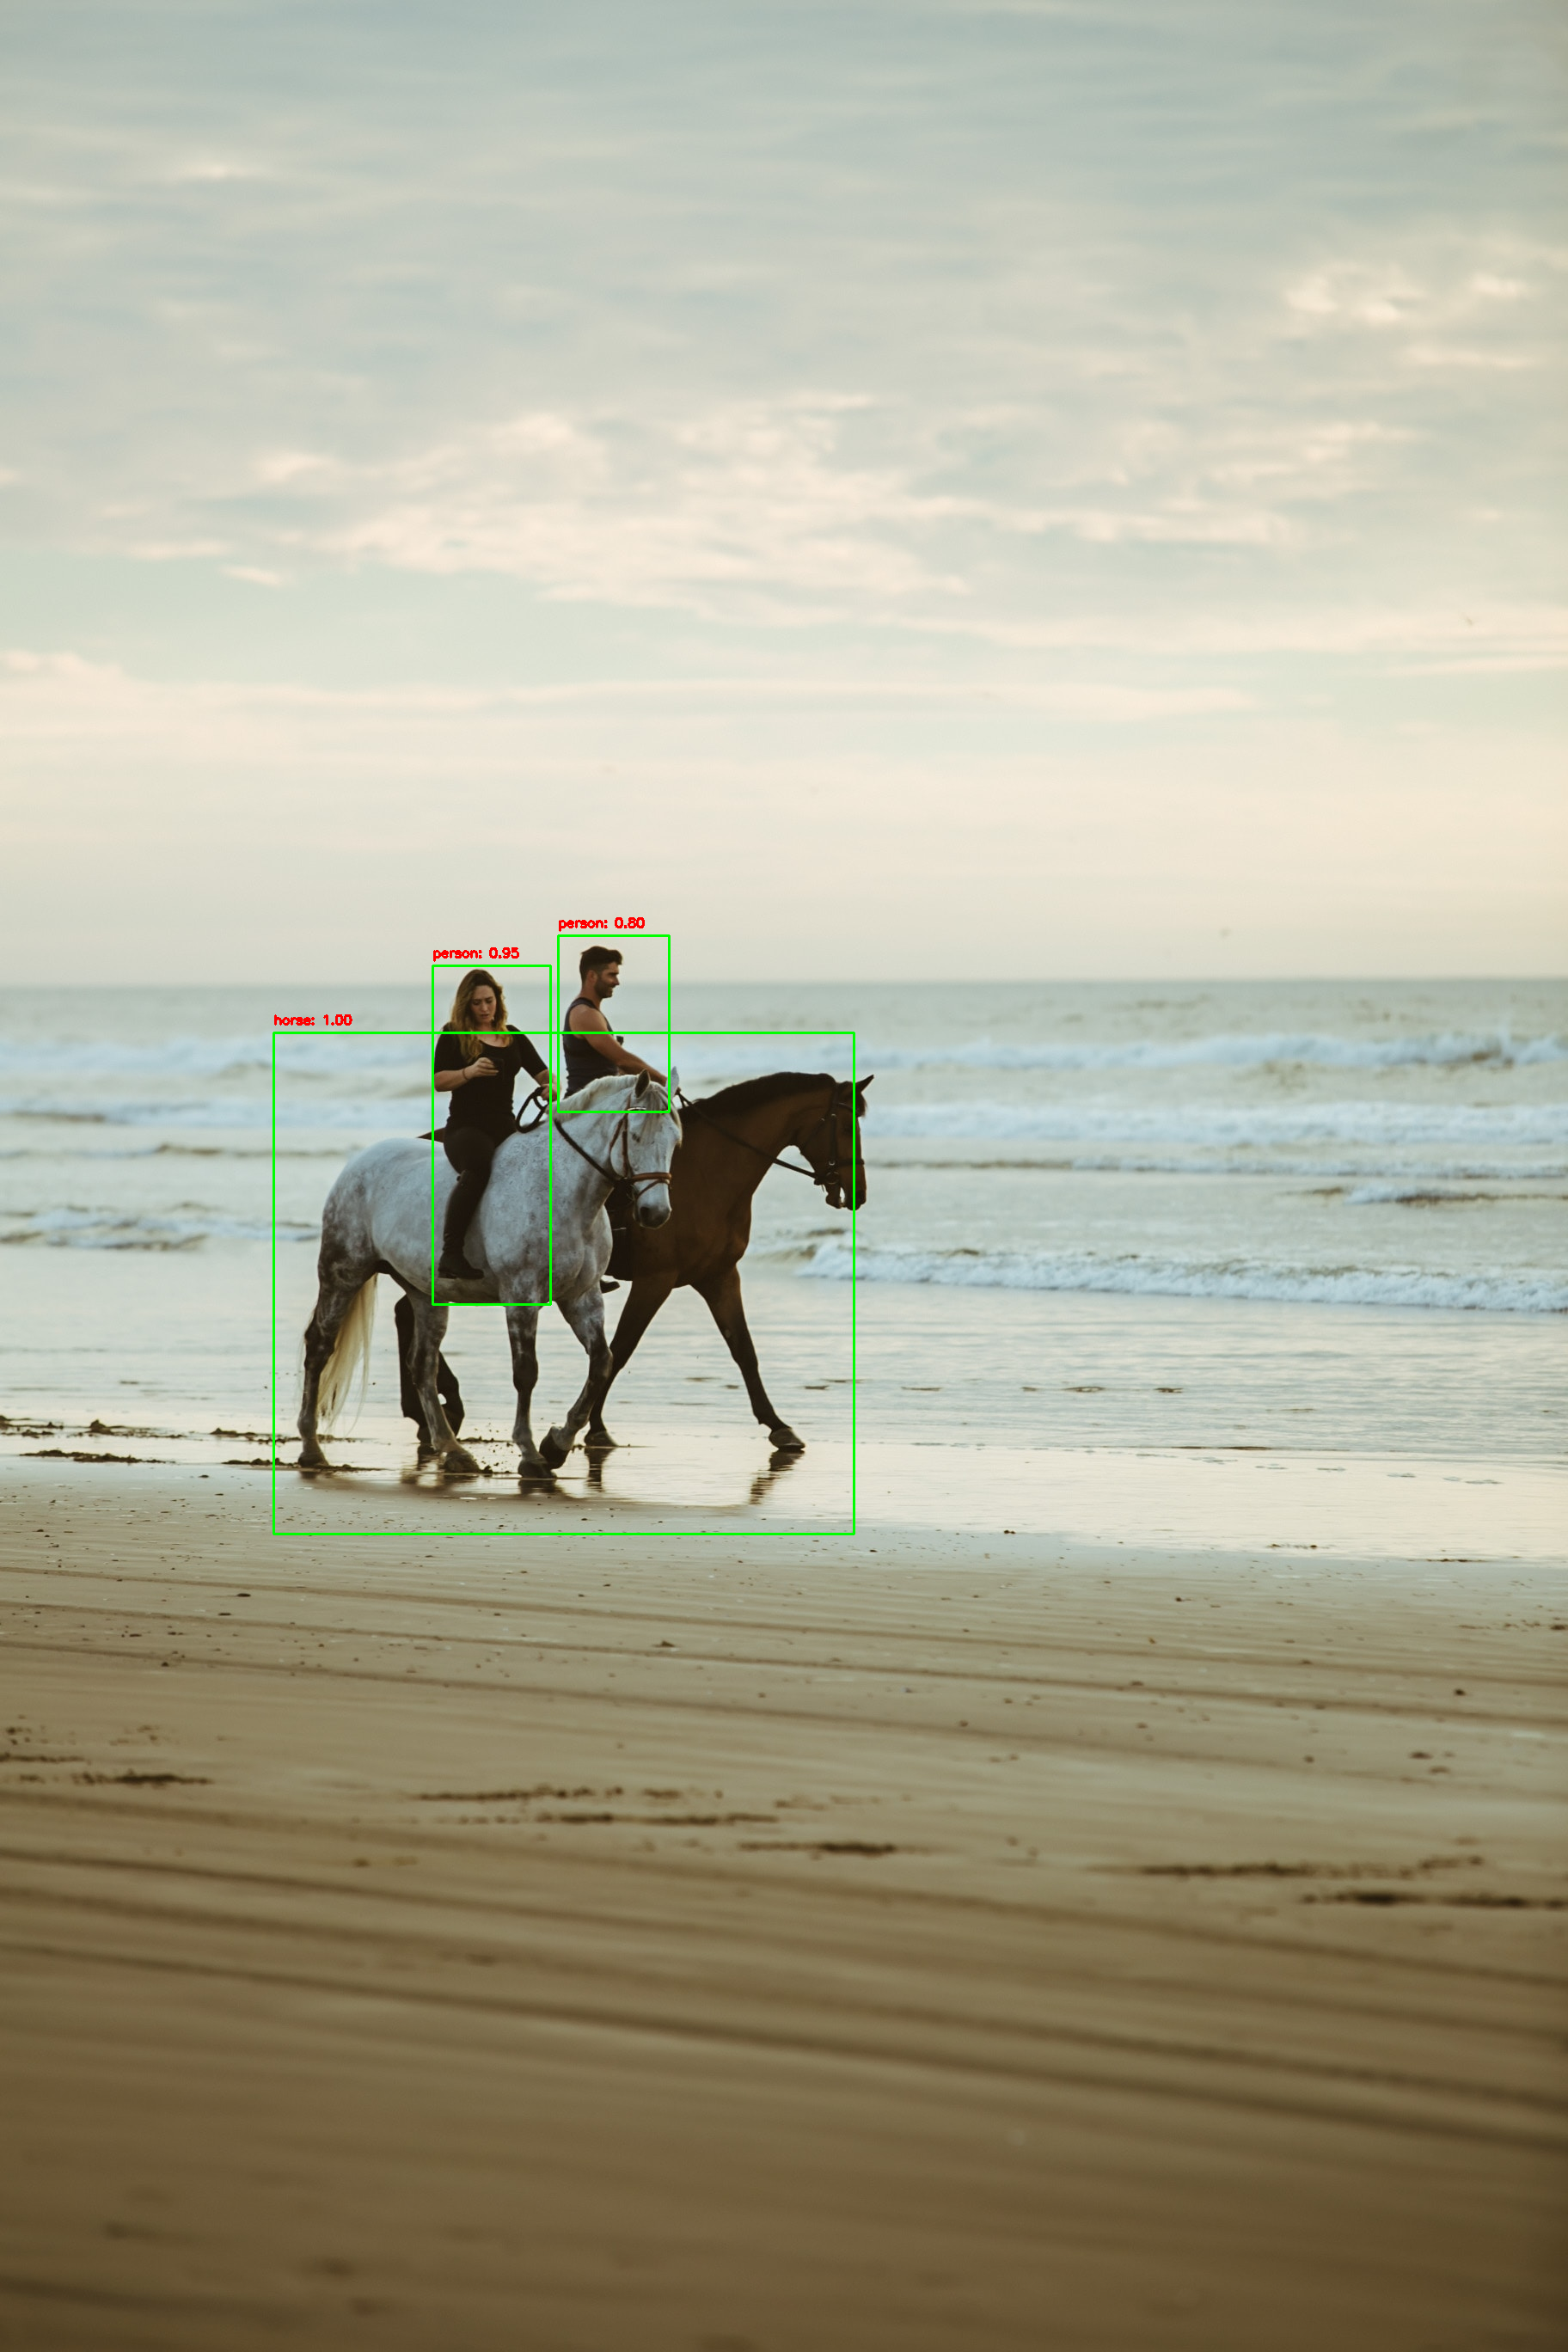

In [65]:
img  = detect_objects('/content/horse_man_women.jpg')
display_img(img)

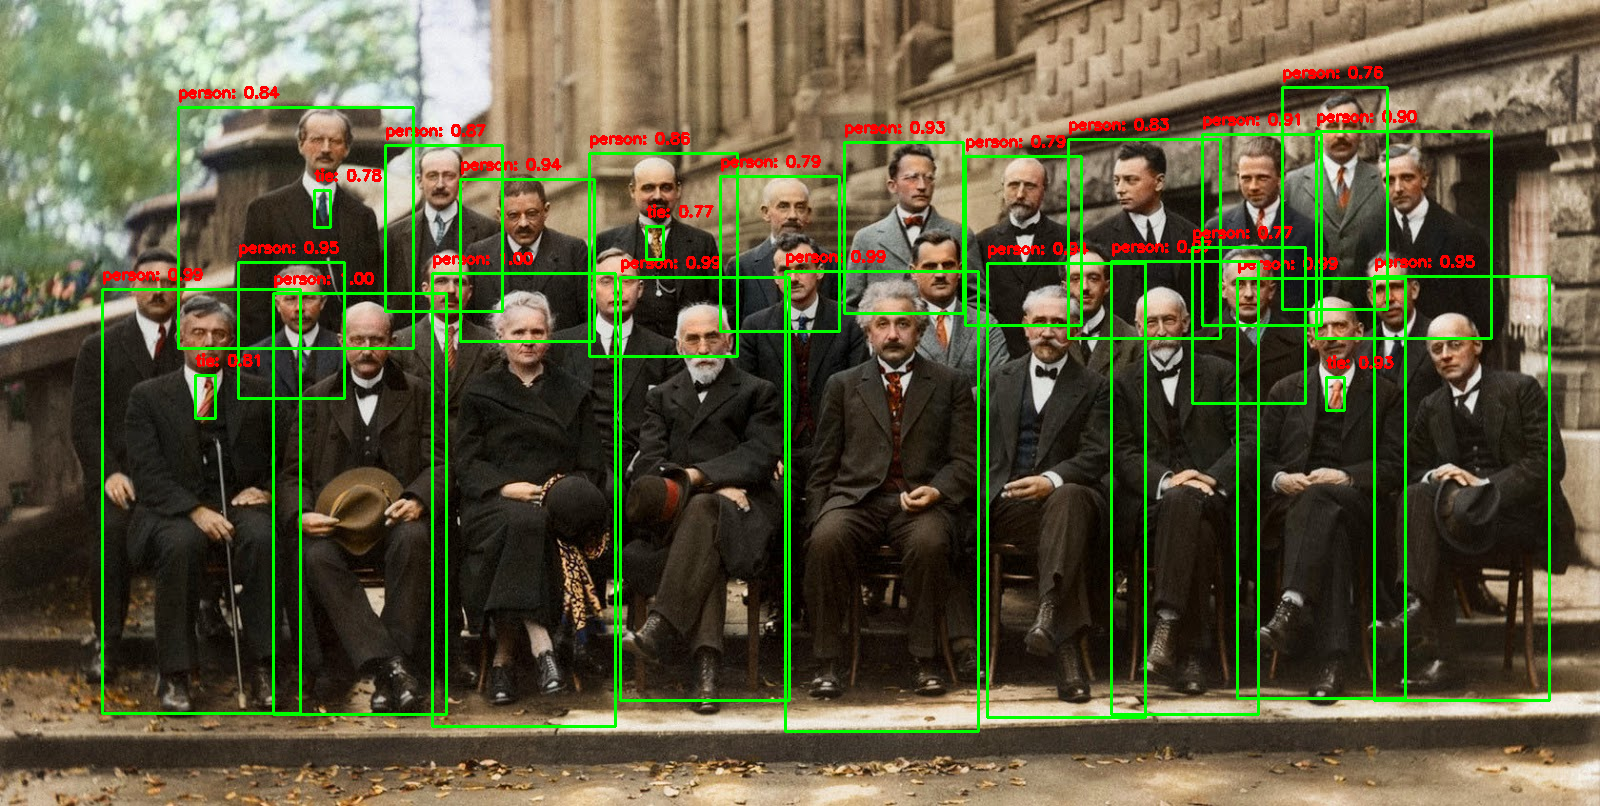

In [66]:
img2  = detect_objects('/content/solvay_conference.jpg')
display_img(img2)